In [6]:
import fuzzy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Importing the dataset which is delimited by a semicolon
author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter = ';')

# Extracting the first names of the authors
first_name = []
for name in author_df['Author']:
    first_name.append(name.split()[0])

# Adding a new column for First Names
author_df['first_name'] = pd.Series(first_name)

# Inspecting the resultant DataFrame
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


In [8]:
# Creating NYSIIS (New York State Identification and Intelligence System) Equivalents for the First Names
nysiis_name = []
for name in author_df['first_name'] :
    nysiis_name.append(fuzzy.nysiis(name))

# Adding a new column for the NYSIIS Equivalents
author_df['nysiis_name'] = pd.Series(nysiis_name)

# Inspecting the unique sounding first names
print(len(np.unique(author_df['first_name'])) - len(np.unique(author_df['nysiis_name'])))

25


In [11]:
# Reading in Baby Names Dataset derived from Social Security Administration's Data which is semicolon delimited
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter = ';')

# Idenifitying Gender 
gender = []
for _, row in babies_df.iterrows() :
    
    if row['perc_male'] > row['perc_female'] :
        gender.append('Male')
        continue
    
    elif row['perc_female'] > row['perc_male'] :
        gender.append('Female')
        continue
    
    else :
        gender.append('Unknown')

# Creating a column for gender in the DataFrame
babies_df['gender'] = pd.Series(gender)

# Inspecting the DataFrame
babies_df.head()

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,Female
1,RAX,63.64,36.36,Female
2,ESAR,44.44,55.56,Male
3,DJANG,0.00,100.00,Male
4,PARCAL,25.00,75.00,Male


In [12]:
# Function to return the position of an element in the list, returns -1 if the item does not exist
def locate(element_list, element):
    location = element_list.index(element) if element in element_list else -1
    return(location)

# Identifying the gender of each author
author_gender = []
for nysiis_name in author_df['nysiis_name'] :
    
    idx = locate(list(babies_df['babynysiis']), nysiis_name)
    
    if idx > -1 :
        author_gender.append(babies_df['gender'][idx])
    
    else :
        author_gender.append('Unknown')

# Creating a column for the gender of the author
author_df['author_gender'] = author_gender

# Analysing the number of genders in the DataFrame
author_df['author_gender'].value_counts()

Female     395
Male       191
Unknown     17
Name: author_gender, dtype: int64

In [20]:
# Creating a list of unique years sorted in ascending order.
years = sorted(np.unique(author_df['Year']))

# Creating lists to store years filered by gender
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Populating the lists
for year in years :
    
    males_by_yr.append(len(author_df[(author_df['author_gender'] == 'Male') & (author_df['Year'] == year)]))
                                      
    females_by_yr.append(len(author_df[(author_df['author_gender'] == 'Female') & (author_df['Year'] == year)]))
    
    unknown_by_yr.append(len(author_df[(author_df['author_gender'] == 'Unknown') & (author_df['Year'] == year)]))

print("Year", '\t', "Males", '\t', "Females", '\t', "Unknowns")

# Printing out yearly values to examine changes over time
for i in range(len(males_by_yr)) :
    print(years[i], '\t', males_by_yr[i], '\t', females_by_yr[i], '\t\t', unknown_by_yr[i])

Year 	 Males 	 Females 	 Unknowns
2008 	 8 	 15 		 2
2009 	 19 	 45 		 3
2010 	 27 	 48 		 1
2011 	 21 	 51 		 2
2012 	 21 	 46 		 2
2013 	 11 	 51 		 3
2014 	 21 	 34 		 2
2015 	 18 	 30 		 0
2016 	 25 	 32 		 1
2017 	 20 	 43 		 1


Text(0, 0.5, 'Unknowns')

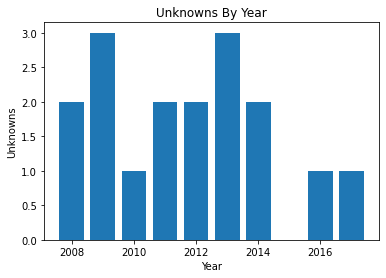

In [21]:
# Bar Chart of Exotic Names
plt.bar(x = years, height = unknown_by_yr)
plt.title('Unknowns By Year')
plt.xlabel('Year')
plt.ylabel('Unknowns')

Text(0, 0.5, 'Gender')

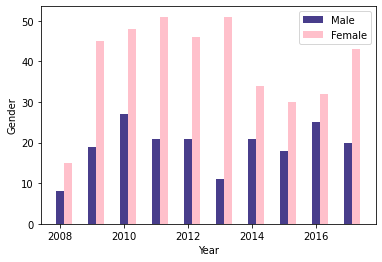

In [29]:
# Shifting the Years to create a comparative plot
years_shifted = [year + 0.25 for year in years]

# Bar Chart of Males and Females By Year
plt.bar(x = years, height = males_by_yr, width = 0.25, color = 'darkslateblue')
plt.bar(x = years_shifted, height = females_by_yr, width = 0.25, color = 'pink')
plt.legend(["Male", "Female"], loc ="upper right")
plt.xlabel('Year')
plt.ylabel('Gender')